# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

In [130]:
### YOUR CODE HERE ###
import psycopg2
import pandas as pd
import sqlite3

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)

cursor = conn.cursor()





### Проверим следующие гипотезы:
1. Есть зависимость между зарплатой и расой / полом сотрудника.
2. Есть зависимость между продолжительностью работы в компании и perfomance score.
3. Есть зависимость между продолжительностью работы в компании и отделом, в котором работает сотрудник.
4. Есть зависимость между perfomance score и семейным положением сотрудника.


Гипотеза 1:

In [131]:
df1_1 = pd.read_sql_query('select "sex", "racedesc", AVG("Pay Rate") from public.hr_dataset GROUP BY "sex", "racedesc" ORDER BY "sex", "racedesc";', conn)
df1_1.index = pd.MultiIndex.from_frame(df1_1[['sex', 'racedesc']], names=['sex', 'racedesc'])
del df1_1['sex']
del df1_1['racedesc']
df1_1


avg
sex    racedesc                                   
Female American Indian or Alaska Native  24.750000
       Asian                             27.969524
       Black or African American         35.359687
       Hispanic                          17.000000
       Two or more races                 25.409091
       White                             28.651818
Male   American Indian or Alaska Native  36.000000
       Asian                             36.830769
       Black or African American         35.328800
       Hispanic                          47.333333
       Two or more races                 40.465714
       White                             31.595663

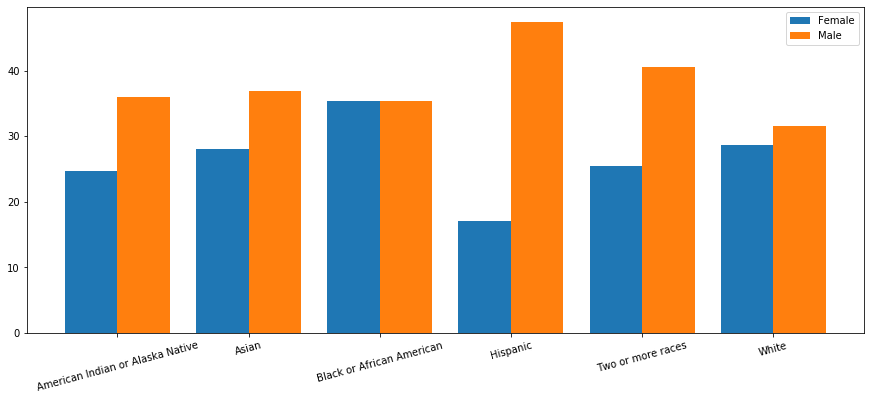

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#  Задаем смещение равное половине ширины прямоугольника:
x1 = np.arange(0, 6) - 0.2
x2 = np.arange(0, 6) + 0.2
y1 = df1_1.loc['Female']['avg']
y2 = df1_1.loc['Male']['avg']

fig, ax = plt.subplots()

ax.bar(x1, y1, width = 0.4, label = 'Female')
ax.bar(x2, y2, width = 0.4, label = 'Male')

ax.set_xticks(np.arange(0, 6))
ax.set_xticklabels(df1_1.loc['Female'].index, rotation = 15)

fig.set_figwidth(15)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax.legend()
plt.show()

Гипотеза 2:

In [44]:
df1_2 = pd.read_sql_query('select "Performance Score", AVG("Days Employed") from public.hr_dataset GROUP BY "Performance Score";', conn)
df1_2


,Performance Score,avg
0,Exceptional,1701.333333
1,90-day meets,1055.806452
2,N/A- too early to review,552.405405
3,Fully Meets,1405.558011
4,Exceeds,1627.428571
5,PIP,1426.888889
6,Needs Improvement,1365.866667


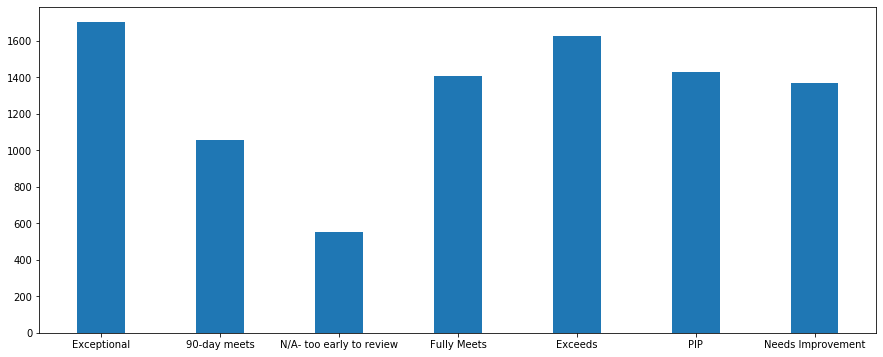

In [50]:
%matplotlib inline


x1 = np.arange(0, df1_2.shape[0])

y1 = df1_2['avg']

fig, ax = plt.subplots()

ax.bar(x1, y1, width = 0.4)

ax.set_xticks(np.arange(0, df1_2.shape[0]))
ax.set_xticklabels(df1_2['Performance Score'], rotation = 0)

fig.set_figwidth(15)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

Гипотеза 3:

In [18]:
df1_3 = pd.read_sql_query('select "department", AVG("Days Employed") from public.hr_dataset GROUP BY "department";', conn)
df1_3

,department,avg
0,Production,1308.024038
1,Admin Offices,1420.700000
2,IT/IS,981.800000
3,Executive Office,1973.000000
4,Software Engineering,1417.800000
5,Sales,1621.548387


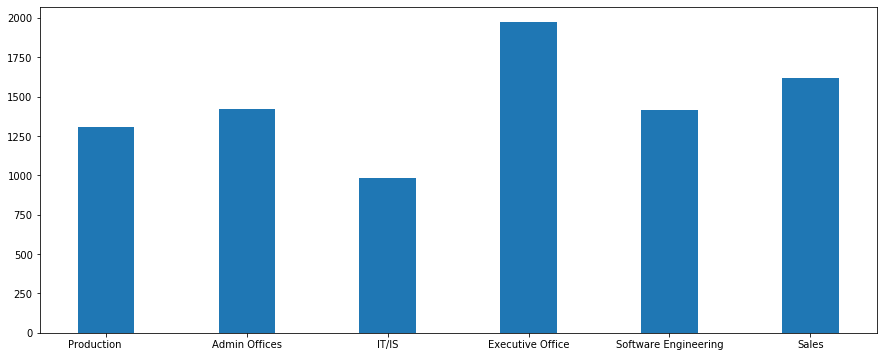

In [49]:
%matplotlib inline


x1 = np.arange(0, df1_3.shape[0])

y1 = df1_3['avg']

fig, ax = plt.subplots()

ax.bar(x1, y1, width = 0.4)

ax.set_xticks(np.arange(0, df1_3.shape[0]))
ax.set_xticklabels(df1_3['department'], rotation = 0)

fig.set_figwidth(15)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

Гипотеза 4:

In [74]:
df1_5 = pd.read_sql_query('select "maritaldesc", "Performance Score", COUNT("Pay Rate") from public.hr_dataset GROUP BY "maritaldesc", "Performance Score" ORDER BY "maritaldesc", "Performance Score";', conn)
hname5 = pd.unique(df1_5['maritaldesc']).tolist()
df1_5.index = pd.MultiIndex.from_frame(df1_5[['maritaldesc', 'Performance Score']], names=['maritaldesc', 'Performance Score'])
del df1_5['maritaldesc']
del df1_5['Performance Score']
df1_5

count
maritaldesc Performance Score              
Divorced    90-day meets                  3
            Exceeds                       4
            Exceptional                   1
            Fully Meets                  16
            N/A- too early to review      4
            Needs Improvement             2
Married     90-day meets                 15
            Exceeds                      10
            Exceptional                   1
            Fully Meets                  73
            N/A- too early to review     14
            Needs Improvement             6
            PIP                           4
Separated   Exceeds                       2
            Fully Meets                   8
            N/A- too early to review      1
            PIP                           1
Single      90-day meets                 13
            Exceeds                      12
            Exceptional                   6
            Fully Meets                  81
            N/A- too early to review     14
            Needs Improvement             7
            PIP                           4
Widowed     Exceptional                   1
            Fully Meets                   3
            N/A- too early to review      4

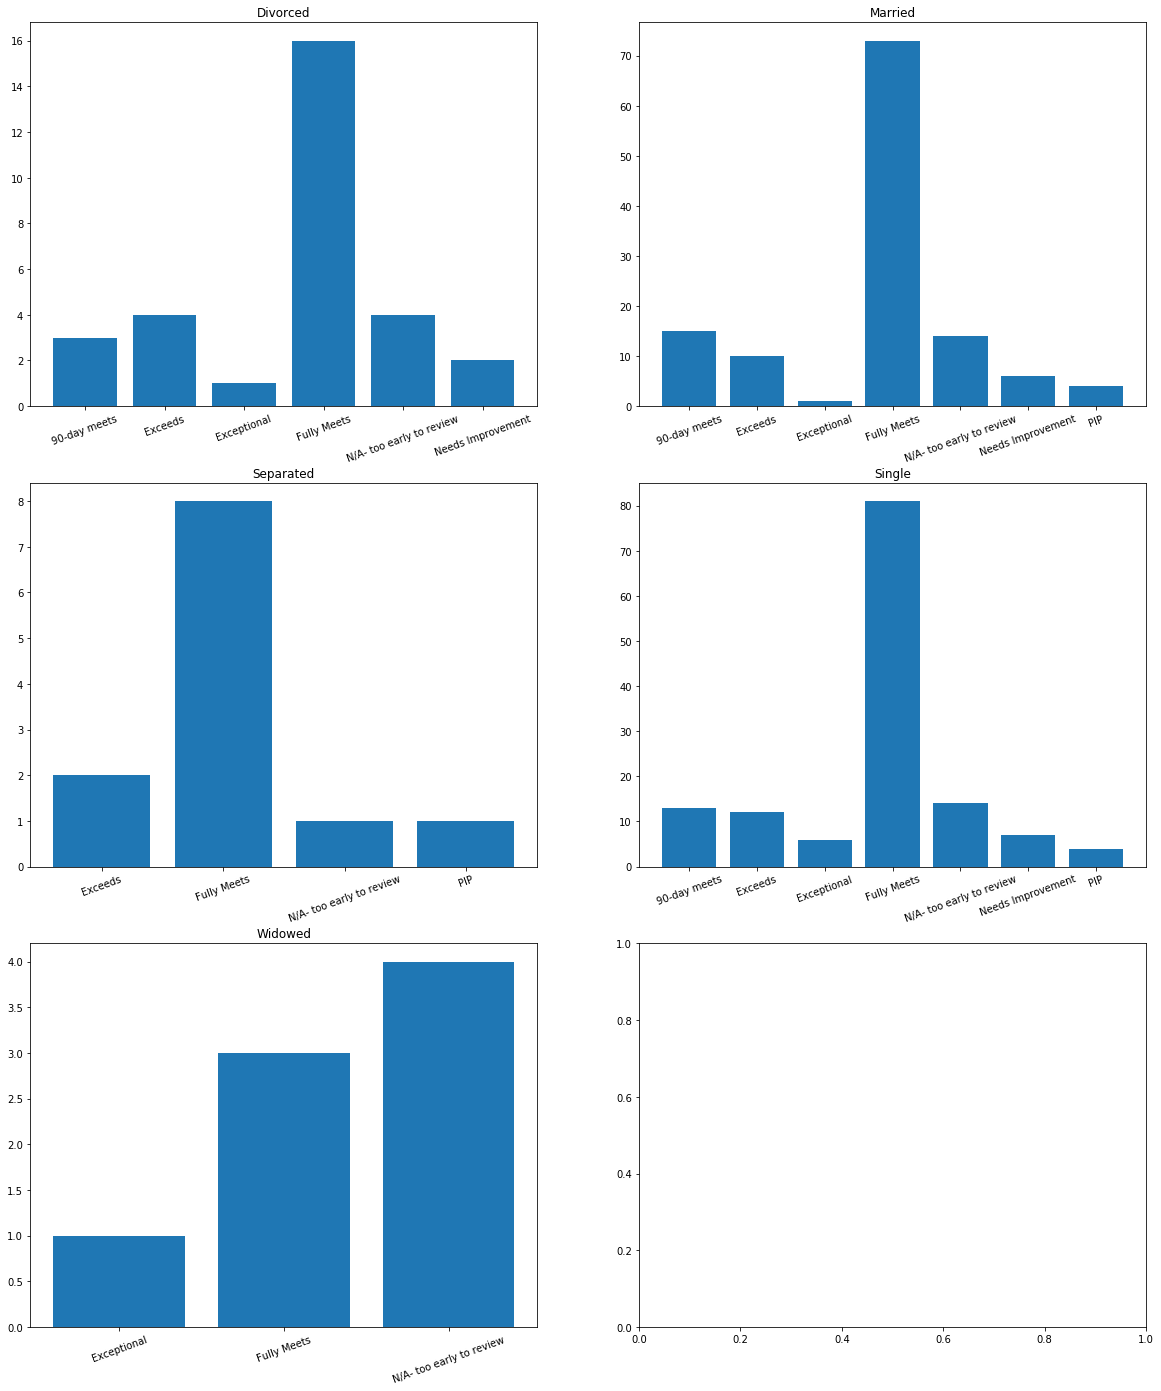

In [85]:
k = 0
#register_matplotlib_converters()
fig, axs = plt.subplots(3, 2, figsize=(20, 24))

for i in range(3):
    for j in range(2):
        if k < 5:
            
  
            lenth = len(df1_5.loc[hname5[k]].index)
            xpos = np.arange(lenth)
            axs[i, j].bar(xpos, df1_5.loc[hname5[k]]['count'])

            axs[i, j].set_title(hname5[k])

            axs[i, j].set_xticks(xpos)
            axs[i, j].set_xticklabels(df1_5.loc[hname5[k]].index, rotation = 20)

            k+=1
        else:
            break

### Отчет:
Выводы по гипотезам:
Гипотеза 1 (Есть зависимость между зарплатой и расой / полом сотрудника.):
1. Подобная зависимость действительно есть, при этом как по расовому так и по половому признаку.
2. Женщины в большинстве случаев получают меньше мужчин (исключение составляют только чернокожие, но и там разница не существенна)
3. Наиболее странно выглядят испаноязычные: мужчины там самые высокооплачиваемые, а женщины самые низкооплавичваемые по всей выборке.

Гипотеза 2 (Есть зависимость между продолжительностью работы в компании и perfomance score.):
1. Тут все ожидаемо, сотрудники со статусами Exceptional и Exceeds работают в среднем дольше в компании, при этом сотрудники со статусом N/A- too early to review (то есть их навыки еще рано оценивать) действительно работают в компании недолго.

Гипотеза 3 (Есть зависимость между продолжительностью работы в компании и отделом, в котором работает сотрудник.):
1. Такая зависимость наблюдается, в отделе IT/IS работают меньше всего, в отделе Executive Office дольше всего.

Гипотеза 4 (Есть зависимость между perfomance score и семейным положением сотрудника.)
1. Тут зависимость невыраженная, в целом во всех группах большиство сотрудников соответствуют уровню Fully Meets. Исключение составляют вдовствующие, однако по ним меньше всего данных.


### Рекомендации:
1. Стоит обратить внимание на разницу в оплате труда по расовому и половому признаку, возможно она является следствием различия в должностях и уровнем perfomance score, но возможно и следствием предрассудков.
2. Хорошие показатели в perfomance score достигают сотрудники, долго работающие в компании. Стоит отметить, что здесь обнаружена только корреляция, но не каузация, однако логично предположить, что со временем квалификация сотрудника растет. Стоит ценить кадры, которые уже долго работают в компании.
3. В отделе IT/IS работают меньше всего, возможно наблюдается высокая текучесть кадров. Следует улучшить условия труда для этих сотрудников.
4. Хоть явная связь между perfomance score и семейным положением сотрудника и не была выявлена, все же не стоит забывать, что в сложной жизненной ситуации (при разводе или потере супруга) психологическое состояние сотрудника может ухудшиться, а вследствии этого ухудшится работоспособность, поэтому рекомендуется обеспечивать сотрудников услугами профессиональных психологов.

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

In [98]:
import requests
import datetime as dt
import time
import numpy as np
import pandas as pd
import math


def cnt(x):
    return x['count']

def datedt(x):
    return dt.datetime.fromtimestamp(x)

def car(x):
    if x > pd.to_datetime('2020-03-25'):
        return True
    else:
        return False


access_token = '17d8d83017d8d83017d8d8309b17aaadcb117d817d8d8304903711fecdace1c08f37dea'
api_version = '5.107'

off = 0
off1 = 0
count1 = 0


de = pd.to_datetime('2020-03-25')
de1 = pd.to_datetime('2020-05-25')
de2 = pd.to_datetime('2020-01-25')


cto = 100
while (off1 == 0): #Найдем номер поста, дата публикации которотого соответсвует 2020-05-25
    r1 = requests.get('https://api.vk.com/method/wall.get',params={'owner_id':-66669811, 
                                                                   'offset':0, 
                                                                   'count':cto, 
                                                                   'access_token':access_token, 
                                                                   'v':api_version})
    response1 = r1.json()
    for i in range(100):
        res1 = response1['response']['items'][i]['date']
        if (dt.datetime.fromtimestamp(res1) < de1):
            off1 = i
            break
    cto += 100
        

off2 = 0        
cto = 0
while (off2 == 0): #Найдем номер поста, дата публикации которотого соответсвует 2020-01-25
    r1 = requests.get('https://api.vk.com/method/wall.get',params={'owner_id':-66669811, 
                                                                   'offset':cto, 
                                                                   'count':100, 
                                                                   'access_token':access_token, 
                                                                   'v':api_version})
    response1 = r1.json()
    for i in range(100):
        res2 = response1['response']['items'][i]['date']
        if (dt.datetime.fromtimestamp(res2) < de2):
            off2 = cto + i
            break
    cto += 100
    
qaz = math.ceil((off2 - off1) / 100)    
#Сформируем основной датафрейм
if qaz > 1:
    
    for i in range(qaz):
        if i == 0:
            r1 = requests.get('https://api.vk.com/method/wall.get',params={'owner_id':-66669811, 
                                                                       'offset':off1, 
                                                                       'count':100, 
                                                                       'access_token':access_token, 
                                                                       'v':api_version})
            response1 = r1.json()
            main2 = pd.DataFrame(response1['response']['items']) #формируем датафрейм из первых 100 записей
            off1 += 100

        elif i == qaz-1:
            r1 = requests.get('https://api.vk.com/method/wall.get',params={'owner_id':-66669811, 
                                                                       'offset':off1, 
                                                                       'count':off2 - off1, 
                                                                       'access_token':access_token, 
                                                                       'v':api_version})
            response1 = r1.json()
            df2end = pd.DataFrame(response1['response']['items']) #формируем датафрейм для последних записей
            main2 = pd.concat([main2, df2end], ignore_index=True)

        else:
            r1 = requests.get('https://api.vk.com/method/wall.get',params={'owner_id':-66669811, 
                                                                       'offset':off1, 
                                                                       'count':100, 
                                                                       'access_token':access_token, 
                                                                       'v':api_version})
            response1 = r1.json()
            df2mid = pd.DataFrame(response1['response']['items']) #формируем промежуточный датафрейм на 100 записей
            main2 = pd.concat([main2, df2mid], ignore_index=True)
            off1 += 100
else:
    r1 = requests.get('https://api.vk.com/method/wall.get',params={'owner_id':-66669811, 
                                                                       'offset':off1, 
                                                                       'count':off2 - off1, 
                                                                       'access_token':access_token, 
                                                                       'v':api_version})
    response1 = r1.json()
    main2 = pd.DataFrame(response1['response']['items']) #формируем датафрейм для последних записей
    
main2['likes_c'] = main2['likes'].apply(cnt)
main2['reposts_c'] = main2['reposts'].apply(cnt)
main2['comments_c'] = main2['comments'].apply(cnt)
main2['views_c'] = main2['views'].apply(cnt)
main2['datef'] = main2['date'].apply(datedt)
main2['carantine'] = main2['datef'].apply(car)
main2 = main2[['text', 'likes_c', 'reposts_c', 'comments_c', 'views_c', 'datef', 'carantine']]

main2


,text,likes_c,reposts_c,comments_c,views_c,datef,carantine
0,Кирилл и Мефодий бы оценили!\n\nКо Дню славянс...,83,9,4,21344,2020-05-24 13:25:25,True
1,В 1983 году американский студент Фред Коэн нап...,157,7,22,31862,2020-05-23 14:24:28,True
2,Прокачаем креативность еще на пару уровней?\n\...,51,4,114,28881,2020-05-22 11:00:59,True
3,Когда игра выглядит реалистичнее самой реально...,151,13,33,32362,2020-05-21 12:58:05,True
4,"Друзья, Skillbox и проект [club88414131|«Учите...",55,7,11,26376,2020-05-20 12:10:13,True
...,...,...,...,...,...,...,...
203,Мы слишком долго держали это в секрете. Больше...,17,2,7,17309,2020-01-27 18:30:04,False
204,Расчехляйте конспекты! Неделя будет интенсивно...,80,7,12,17895,2020-01-27 16:09:22,False
205,По каким показателям нужно оценивать работу ма...,111,17,5,28167,2020-01-27 11:20:49,False
206,"Сегодня 26 января, и вы видите этот пост?\nПох...",111,7,10,30173,2020-01-26 12:23:33,False


### Пояснение
За период для исследования возьмем отрезок с 25.01.20 по 25.05.20. Берем по два месяца до и после введения режима самоизоляции в РФ (моментом введения режима самоизоляции будем считать первое обращение Путина 25.03.20).
Проведем следующие исследования:
1. Сравним активность до и после введения карантина и сравним ее с показателями по 4 месяцам, чтобы оценить значимость именно карантина, а не просто потенциальное увеличение аудитории у паблика.
2. Оценим активность по дням недели.
3. Оценим активность по тэгам.


Будем использовать медианное значение, а не среднее, чтобы уменьшить влияние постов с чрезвычайно хорошими показателями (например, розыгрыши).

In [110]:
df_car = main2.groupby('carantine')[['likes_c', 'reposts_c', 'comments_c', 'views_c']].agg('median')
df_car

,likes_c,reposts_c,comments_c,views_c
carantine,,,,
False,61,5,5,14995
True,77,6,9,21427


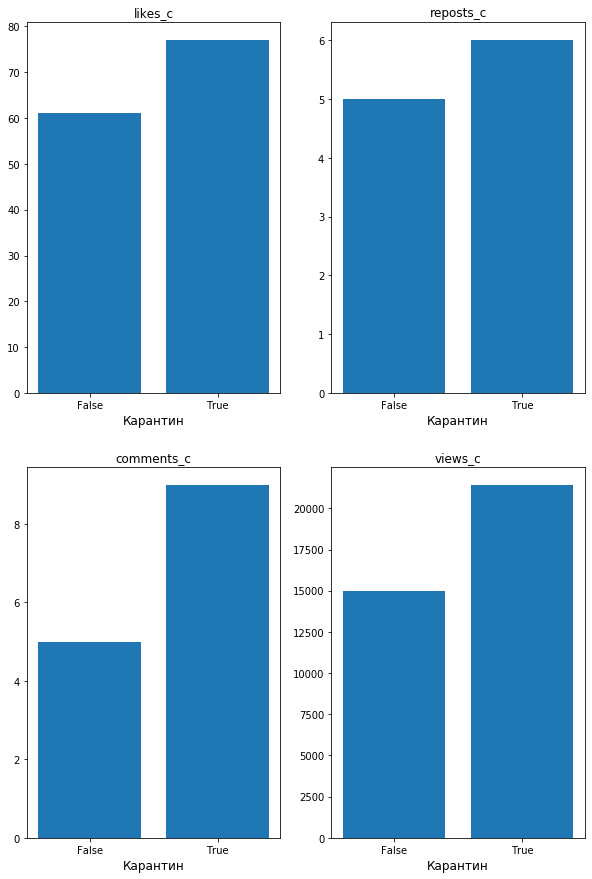

In [119]:
cname = list(df_car.columns)
k = 0
#register_matplotlib_converters()
fig, axs = plt.subplots(2, 2, figsize=(10, 15))

for i in range(2):
    for j in range(2):
        
        lenth = len(df_car.index)
        xpos = np.arange(lenth)
        axs[i, j].bar(xpos, df_car[cname[k]])

        axs[i, j].set_title(cname[k])
        axs[i, j].set_xlabel('Карантин', fontsize=12)
        axs[i, j].set_xticks(xpos)
        axs[i, j].set_xticklabels(df_car.index, rotation = 0)

        k+=1
        

Показатели (особенно просмотры и комментарии) после введения карантина действительно улучшились, однако стоит проверить не является ли это просто следствием увеличения аудитории у паблика. Для этого выделим 4 периода:
1. с 2020-01-25 по 2020-02-25
2. с 2020-02-25 по 2020-03-25
3. с 2020-03-25 по 2020-04-25
4. с 2020-04-25 по 2020-05-25

In [121]:
def per(x):
    if x < pd.to_datetime('2020-02-25'):
        return 1
    elif x < pd.to_datetime('2020-03-25'):
        return 2
    elif x < pd.to_datetime('2020-04-25'):
        return 3
    else:
        return 4
    
main2['period'] = main2['datef'].apply(per)
main2

,text,likes_c,reposts_c,comments_c,views_c,datef,carantine,period
0,Кирилл и Мефодий бы оценили!\n\nКо Дню славянс...,83,9,4,21344,2020-05-24 13:25:25,True,4
1,В 1983 году американский студент Фред Коэн нап...,157,7,22,31862,2020-05-23 14:24:28,True,4
2,Прокачаем креативность еще на пару уровней?\n\...,51,4,114,28881,2020-05-22 11:00:59,True,4
3,Когда игра выглядит реалистичнее самой реально...,151,13,33,32362,2020-05-21 12:58:05,True,4
4,"Друзья, Skillbox и проект [club88414131|«Учите...",55,7,11,26376,2020-05-20 12:10:13,True,4
...,...,...,...,...,...,...,...,...
203,Мы слишком долго держали это в секрете. Больше...,17,2,7,17309,2020-01-27 18:30:04,False,1
204,Расчехляйте конспекты! Неделя будет интенсивно...,80,7,12,17895,2020-01-27 16:09:22,False,1
205,По каким показателям нужно оценивать работу ма...,111,17,5,28167,2020-01-27 11:20:49,False,1
206,"Сегодня 26 января, и вы видите этот пост?\nПох...",111,7,10,30173,2020-01-26 12:23:33,False,1


In [122]:
df_per = main2.groupby('period')[['likes_c', 'reposts_c', 'comments_c', 'views_c']].agg('median')
df_per

,likes_c,reposts_c,comments_c,views_c
period,,,,
1,63.0,5.0,5.0,15247.0
2,56.0,4.0,4.0,14870.5
3,58.0,4.0,7.5,19172.5
4,94.0,7.0,11.0,25551.0


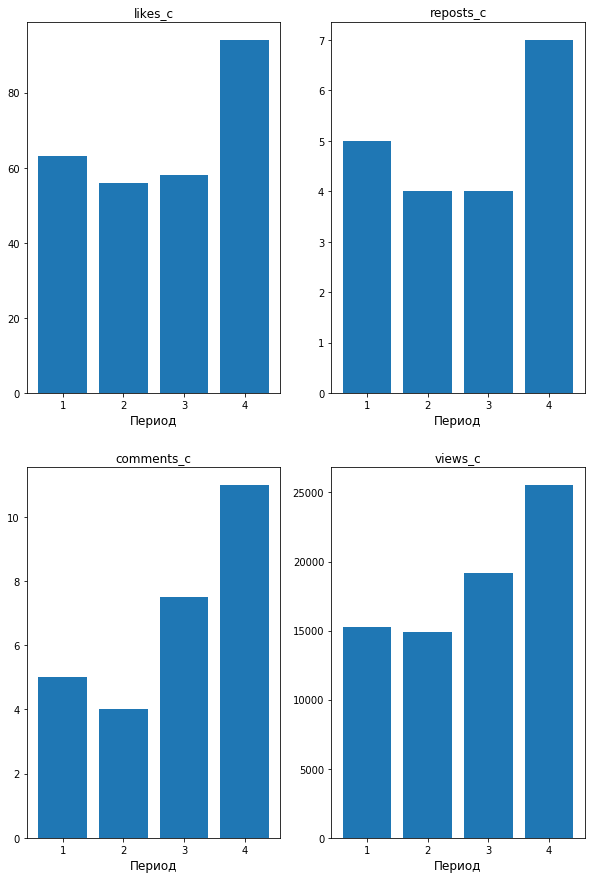

In [123]:
k = 0
#register_matplotlib_converters()
fig, axs = plt.subplots(2, 2, figsize=(10, 15))

for i in range(2):
    for j in range(2):
        
        lenth = len(df_per.index)
        xpos = np.arange(lenth)
        axs[i, j].bar(xpos, df_per[cname[k]])

        axs[i, j].set_title(cname[k])
        axs[i, j].set_xlabel('Период', fontsize=12)
        axs[i, j].set_xticks(xpos)
        axs[i, j].set_xticklabels(df_per.index, rotation = 0)

        k+=1

Полученные данные достаточно интересны - во втором периоде статистика ухудшилась, однако в 3м (уже после введения карантина) она улучшилась, но не по всем значеним дошла до первого периода. Ощутимое улучшение произошло в 4м периоде. По всей видимости карантин с некоторой задержкой повлиял на активность, но возможно причина в других факторах.

In [124]:
def day_week(x):
    return x.dayofweek


main2['day_of_week'] = main2['datef'].apply(day_week)
main2

,text,likes_c,reposts_c,comments_c,views_c,datef,carantine,period,day_of_week
0,Кирилл и Мефодий бы оценили!\n\nКо Дню славянс...,83,9,4,21344,2020-05-24 13:25:25,True,4,6
1,В 1983 году американский студент Фред Коэн нап...,157,7,22,31862,2020-05-23 14:24:28,True,4,5
2,Прокачаем креативность еще на пару уровней?\n\...,51,4,114,28881,2020-05-22 11:00:59,True,4,4
3,Когда игра выглядит реалистичнее самой реально...,151,13,33,32362,2020-05-21 12:58:05,True,4,3
4,"Друзья, Skillbox и проект [club88414131|«Учите...",55,7,11,26376,2020-05-20 12:10:13,True,4,2
...,...,...,...,...,...,...,...,...,...
203,Мы слишком долго держали это в секрете. Больше...,17,2,7,17309,2020-01-27 18:30:04,False,1,0
204,Расчехляйте конспекты! Неделя будет интенсивно...,80,7,12,17895,2020-01-27 16:09:22,False,1,0
205,По каким показателям нужно оценивать работу ма...,111,17,5,28167,2020-01-27 11:20:49,False,1,0
206,"Сегодня 26 января, и вы видите этот пост?\nПох...",111,7,10,30173,2020-01-26 12:23:33,False,1,6


In [126]:
df_week = main2.groupby('day_of_week')[['likes_c', 'reposts_c', 'comments_c', 'views_c']].agg('median')
df_week

,likes_c,reposts_c,comments_c,views_c
day_of_week,,,,
0,62.0,4.0,6.0,17602.0
1,52.0,5.0,4.0,15722.0
2,55.0,4.0,6.0,17079.5
3,65.0,7.5,7.0,19304.5
4,56.0,4.5,6.5,17199.5
5,136.0,7.0,6.0,21658.0
6,119.5,10.5,8.0,27086.5


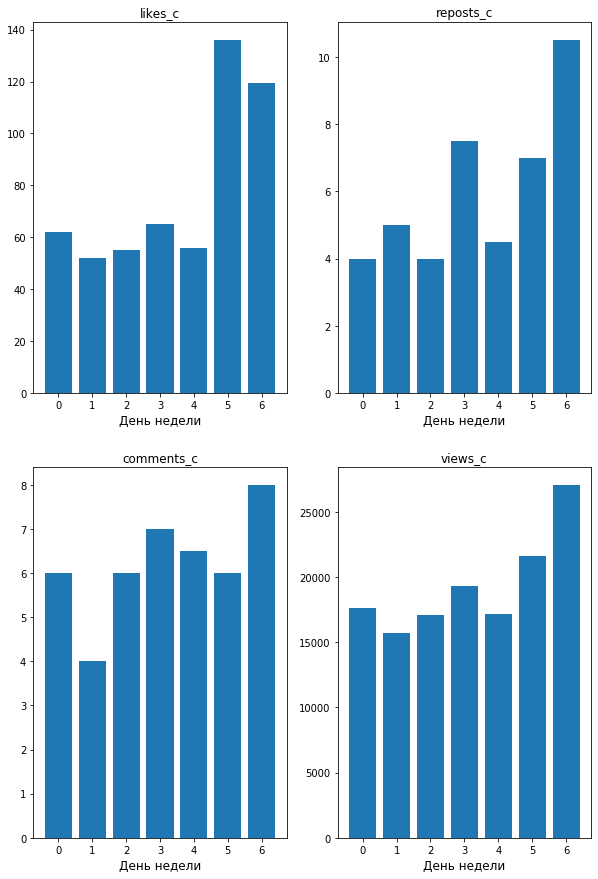

In [127]:
k = 0
#register_matplotlib_converters()
fig, axs = plt.subplots(2, 2, figsize=(10, 15))

for i in range(2):
    for j in range(2):
        
        lenth = len(df_week.index)
        xpos = np.arange(lenth)
        axs[i, j].bar(xpos, df_week[cname[k]])

        axs[i, j].set_title(cname[k])
        axs[i, j].set_xlabel('День недели', fontsize=12)
        axs[i, j].set_xticks(xpos)
        axs[i, j].set_xticklabels(df_week.index, rotation = 0)

        k+=1

Результаты анализа по дням недели довольно однозначны - В целом, в выходные дни показатели лучше, в первую очередь это касается лайков и просмотров. Стоит отметить, что в целом в воскресенье аудитории более активная чем в субботу, но показателя лайков это не касается.

In [128]:
import re

def category(x):
    reg_expr = r'#\w+'
    reg_expr_compiled = re.compile(reg_expr)
    for g in reg_expr_compiled.findall(x[0]):
        df2cat.loc[len(df2cat)] = [x[0], x[1], x[2], x[3], x[4], x[5], g]
        

main23 = main2[['text', 'likes_c', 'reposts_c', 'comments_c', 'views_c', 'datef']]
oby = list(main23.columns)
oby.append('categ')
oby
df2cat = pd.DataFrame(columns = oby)
df2cat

main2.apply(category, axis = 1)


df2cat['likes_c'] = df2cat['likes_c'].astype('int')
df2cat['reposts_c'] = df2cat['reposts_c'].astype('int')
df2cat['comments_c'] = df2cat['comments_c'].astype('int')
df2cat['views_c'] = df2cat['views_c'].astype('int')

df2cat

,text,likes_c,reposts_c,comments_c,views_c,datef,categ
0,Кирилл и Мефодий бы оценили!\n\nКо Дню славянс...,83,9,4,21344,2020-05-24 13:25:25,#Шрифты_Skillbox
1,Кирилл и Мефодий бы оценили!\n\nКо Дню славянс...,83,9,4,21344,2020-05-24 13:25:25,#Skillbox_дизайн
2,В 1983 году американский студент Фред Коэн нап...,157,7,22,31862,2020-05-23 14:24:28,#Skillbox_программирование
3,В 1983 году американский студент Фред Коэн нап...,157,7,22,31862,2020-05-23 14:24:28,#В_закладки_Skillbox
4,Прокачаем креативность еще на пару уровней?\n\...,51,4,114,28881,2020-05-22 11:00:59,#качаем_креатив
...,...,...,...,...,...,...,...
335,По каким показателям нужно оценивать работу ма...,111,17,5,28167,2020-01-27 11:20:49,#Skillbox_маркетинг
336,По каким показателям нужно оценивать работу ма...,111,17,5,28167,2020-01-27 11:20:49,#Совет_препода_Skillbox
337,"Сегодня 26 января, и вы видите этот пост?\nПох...",111,7,10,30173,2020-01-26 12:23:33,#ДеньБезИнтернета
338,"Сегодня 26 января, и вы видите этот пост?\nПох...",111,7,10,30173,2020-01-26 12:23:33,#Skillbox_программирование


In [129]:
df_tag = df2cat.groupby('categ')[['likes_c', 'reposts_c', 'comments_c', 'views_c']].agg('mean')
df_tag

,likes_c,reposts_c,comments_c,views_c
categ,,,,
#AIC_Skillbox,22.00,2.00,14.0,14238.0
#CG_Skillbox,93.00,4.00,4.0,20201.0
#Cовет_препода_Skillbox,356.50,67.00,4.5,34072.0
#Design_Battle_Skillbox,24.00,0.00,30.0,17415.0
#Dominos_Skillbox,31.00,2.00,5.0,21427.0
...,...,...,...,...
#Школа_будущего,55.00,7.00,11.0,26376.0
#Шрифты_Skillbox,82.25,9.75,16.0,19756.5
#день_бэкапа,82.00,9.00,9.0,21412.0


Давайте оценим по 5 самых успешных тэгов по каждому из 4 исслудемых показателей.

In [106]:
df_tag.sort_values(['likes_c'], ascending = False)[:5]

,likes_c,reposts_c,comments_c,views_c
categ,,,,
#Skillbox_TED,878.000000,222.000000,802.000000,85531.000000
#Айдентик_Skillbox,393.000000,25.000000,16.000000,27955.000000
#Cовет_препода_Skillbox,356.500000,67.000000,4.500000,34072.000000
#Альпина_Skillbox,270.000000,41.000000,12.000000,19795.000000
#Skillbox_Дизайн,251.333333,36.333333,8.333333,32710.666667


In [107]:
df_tag.sort_values(['reposts_c'], ascending = False)[:5]

,likes_c,reposts_c,comments_c,views_c
categ,,,,
#Skillbox_TED,878.000000,222.000000,802.000000,85531.000000
#Cовет_препода_Skillbox,356.500000,67.000000,4.500000,34072.000000
#Конкурс_Skillbox,237.333333,51.166667,142.666667,28663.500000
#Альпина_Skillbox,270.000000,41.000000,12.000000,19795.000000
#Skillbox_Дизайн,251.333333,36.333333,8.333333,32710.666667


In [108]:
df_tag.sort_values(['comments_c'], ascending = False)[:5]

,likes_c,reposts_c,comments_c,views_c
categ,,,,
#Skillbox_TED,878.000000,222.000000,802.000000,85531.000000
#Конкурс_Skillbox,237.333333,51.166667,142.666667,28663.500000
#качаем_креатив,48.000000,2.500000,112.000000,24730.000000
#Вам_слово_Skillbox,40.000000,0.000000,68.000000,22301.500000
#Skillbox,155.000000,29.000000,45.666667,18103.666667


In [109]:
df_tag.sort_values(['views_c'], ascending = False)[:5]

,likes_c,reposts_c,comments_c,views_c
categ,,,,
#Skillbox_TED,878.000000,222.000000,802.000000,85531.000000
#дизайн_упаковки_Skillbox,175.000000,7.000000,9.000000,35548.000000
#Cовет_препода_Skillbox,356.500000,67.000000,4.500000,34072.000000
#Правки_Skillbox,79.000000,1.000000,42.000000,33528.000000
#Skillbox_Дизайн,251.333333,36.333333,8.333333,32710.666667


Если судить по тэгам, то самая успешная категория - это #Skillbox_TED. В данном случае мы имеем дело с розыгрышами, а они почти всегда имеют очень неплохие показатели. Так же можно отметить два других тэга: #Skillbox_Дизайн и #Cовет_препода_Skillbox. Их показатели, в целом, неплохи, по 3м показателям из 4 (кроме комментариев) они вошли в 5ку лидеров.

### Рекомендации:
1. Влияние карантина по всей видимости сказалось позитивно на активности в паблике, поэтому стоит больше внимания уделять публикуемому контенту и взаимодействию с пользователями.
2. Самые высокие показатели достигаются по субботам и воскресеньям, так что значимый контент следует публиковать именно в эти дни, так как выше вероятность, что пользователи его увидят и отреагируют на него.
3. Отличные показатели имеют розыгрыши и коллаборации с другими брэндами, так что их стоит проводить и дальше.
4. Из удачных категории стоит отметить: #Skillbox_Дизайн и #Cовет_препода_Skillbox.
5. В целом стоит отметить, что показатель просмотров на большинстве записей достаточно высок, однако вовличенность аудитории (в первую очередь комментарии) оставляет желать лучшего, возможно стоит увеличть степень взаимодействия с аудиторией.